# Content List: 

## 1. Importing the required libraries: The notebook begins by importing necessary libraries such as pandas, numpy, os, matplotlib.pyplot, seaborn, and scipy.

## 2. Reading the CSV file: The notebook reads a CSV file and stores the data in the 'df' variable for further analysis.

## 3. Dataset information: The notebook displays information about the dataset using the `info()` function, providing details about the columns, their data types, and any missing values.

## 4. Mapping month names to numeric values: A dictionary is created to map month names to their corresponding numeric values.

## 5. Mapping categorical column: The 'CrashMonth' column in the dataset is mapped to its numeric values using the previously defined dictionary.

## 6. Exploratory data analysis (EDA):

   b. Descriptive statistics: The `describe()` function is used to generate descriptive statistics of the dataset, providing insights into the central tendency, dispersion, and distribution of numerical columns.

   c. Correlation matrix heatmap: A correlation matrix is created using selected variables, and a heatmap is plotted using seaborn's `heatmap()` function. The heatmap visualizes the correlation between variables, helping identify relationships and dependencies.

   d. Scatter plot: A scatter plot is created using seaborn's `lmplot()` function, showcasing the relationship between the 'BikeAge' and 'CrashHour' variables.

   e. Pair plot: A pair plot is generated using seaborn's `pairplot()` function, allowing for the visualization of pairwise relationships between variables.

   f. Histogram: A histogram is created using seaborn's `histplot()` function to visualize the distribution of the 'CrashHour' variable.

   g. Categorical plot: A categorical plot is created using seaborn's `catplot()` function, representing the relationship between 'BikeAge', 'CrashHour', and the time risk categories ('Safest Time', 'Dangerous Time', 'Fairly Safe Time').

## 7. Answering questions and hypothesis:

   a. Leading causes of bike accidents: Based on the analysis of quantitative variables, the hour of the day (CrashHour) and the age of the drivers (DrvrAge) seem to be factors that may contribute to bike accidents.

   b. Potential new questions: The analysis of longitude and latitude histograms with other categorical variables may provide insights into any additional factors related to bike accidents.

   c. Hypothesis: The hypothesis states that most crashes will involve younger drivers and bicyclists.

## 1. Importing the required libraries: The notebook begins by importing necessary libraries such as pandas, numpy, os, matplotlib.pyplot, seaborn, and scipy.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Reading the CSV file: The notebook reads a CSV file and stores the data in the 'df' variable for further analysis.

In [2]:
file_path = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Achievement 6\North Carolina Bike Crash Analysis\02 Data\Prepared Data\NCDOT_BikePedCrash.csv'  # Corrected file path

In [3]:
df = pd.read_csv(file_path)

## 3. Dataset information: The notebook displays information about the dataset using the `info()` function, providing details about the columns, their data types, and any missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AmbulanceR          11044 non-null  object 
 1   BikeAge             11044 non-null  float64
 2   BikeAlcFlg          11044 non-null  object 
 3   BikeDir             11044 non-null  object 
 4   BikeInjury          11044 non-null  object 
 5   BikeSex             11044 non-null  object 
 6   City                11044 non-null  object 
 7   County              11044 non-null  object 
 8   CrashAlcoh          11044 non-null  object 
 9   CrashDay            11044 non-null  object 
 10  CrashGrp            11044 non-null  object 
 11  CrashHour           11044 non-null  int64  
 12  CrashMonth          11044 non-null  object 
 13  CrashType           11044 non-null  object 
 14  CrashYear           11044 non-null  int64  
 15  DrvrAge             11044 non-null  float64
 16  Drvr

variables to use: BikeAge	CrashHour	CrashYear	DrvrAge	Latitude	Longitude	DrvrAgeImputedFlag	BikeAgeImputedFlag

## 4. Mapping month names to numeric values: A dictionary is created to map month names to their corresponding numeric values.

In [35]:
# Define a dictionary mapping month names to numeric values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Map the 'CrashMonth' column to the numeric values using the dictionary
df['CrashMonthNumeric'] = df['CrashMonth'].map(month_mapping)

## 6. Exploratory data analysis (EDA):

In [36]:
df.head()

,AmbulanceR,BikeAge,BikeAlcFlg,BikeDir,BikeInjury,BikeSex,City,County,CrashAlcoh,CrashDay,...,Longitude,RdConditio,SpeedLimit,TraffCntrl,Weather,Workzone,DrvrAgeImputedFlag,BikeAgeImputedFlag,Time Risk,CrashMonthNumeric
0,Yes,11.0,No,With Traffic,B: Suspected Minor Injury,Male,Durham,Durham,No,Tuesday,...,-78.883896,Dry,30 - 35 MPH,No Control Present,Clear,No,0,0,Dangerous Time,1
1,Yes,20.0,No,Facing Traffic,C: Possible Injury,Male,Cary,Wake,No,Friday,...,-78.782800,Dry,30 - 35 MPH,Stop And Go Signal,Clear,No,0,0,Dangerous Time,1
2,Yes,37.0,No,Unknown,B: Suspected Minor Injury,Male,Stallings,Union,No,Monday,...,-80.697820,Dry,20 - 25 MPH,No Control Present,Cloudy,No,0,0,Dangerous Time,1
3,Yes,30.0,No,With Traffic,C: Possible Injury,Male,Salisbury,Rowan,No,Friday,...,-80.479320,Dry,30 - 35 MPH,No Control Present,Cloudy,No,1,0,Dangerous Time,1
4,Yes,45.0,No,With Traffic,B: Suspected Minor Injury,Male,Fayetteville,Cumberland,No,Friday,...,-78.904450,Dry,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,0,0,Dangerous Time,1


In [37]:
df.describe()

,BikeAge,CrashHour,CrashYear,DrvrAge,Latitude,Longitude,DrvrAgeImputedFlag,BikeAgeImputedFlag,CrashMonthNumeric
count,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000
mean,32.526495,14.576874,2012.562206,42.038506,35.463431,-79.276781,0.139352,0.017476,6.861192
std,17.578942,4.794838,3.452374,16.108923,0.572896,1.538607,0.346329,0.131041,3.005929
min,0.000000,0.000000,2007.000000,9.000000,33.869962,-84.152986,0.000000,0.000000,1.000000
25%,18.000000,12.000000,2010.000000,29.000000,35.168739,-80.696757,0.000000,0.000000,5.000000
50%,29.000000,15.000000,2013.000000,42.038506,35.590104,-78.954483,0.000000,0.000000,7.000000
75%,48.000000,18.000000,2016.000000,52.000000,35.914741,-78.050247,0.000000,0.000000,9.000000
max,93.000000,23.000000,2018.000000,99.000000,36.555054,-75.463524,1.000000,1.000000,12.000000


In [39]:
# Select the variables for the correlation matrix heatmap
variables = ['CrashMonthNumeric','BikeAge', 'CrashHour', 'CrashYear', 'DrvrAge', 'Latitude', 'Longitude', 'DrvrAgeImputedFlag', 'BikeAgeImputedFlag']
correlation_matrix = df[variables].corr()

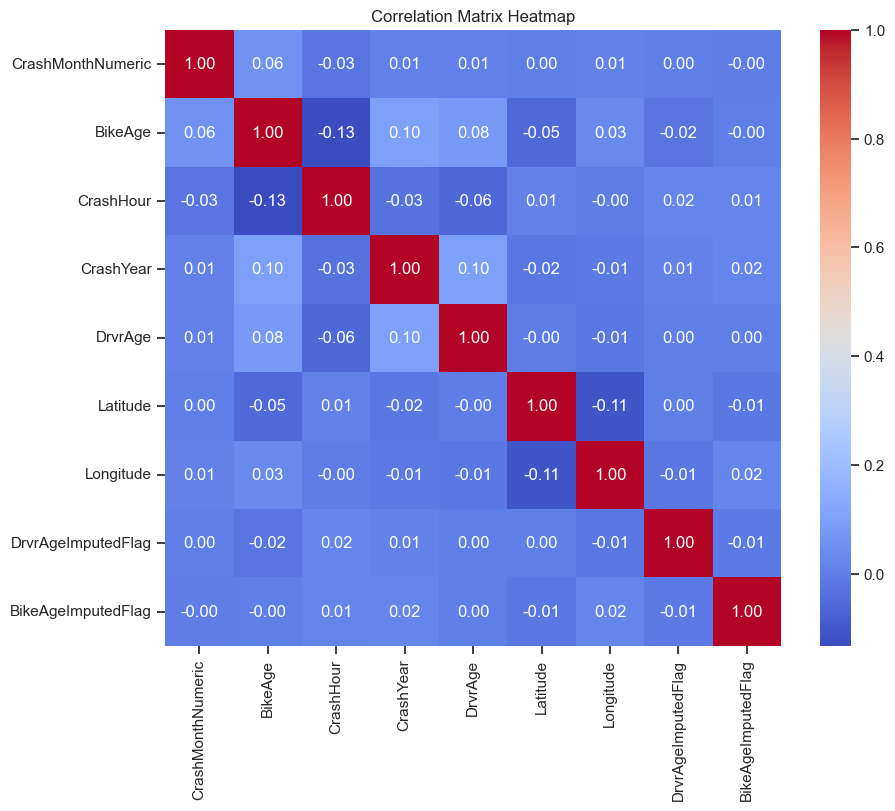

In [40]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

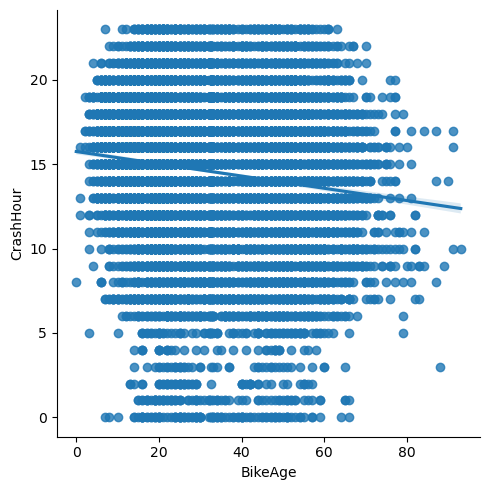

In [19]:
# Create the scatterplot
sns.lmplot(x = 'BikeAge', y = 'CrashHour', data = df)

The relationship in the scatter plot above is the "strongest one" according to the correlation matrix heat map. There doesnt seem to be a positive or negative trend between these 2 variables however, one can see that, most crashes happen in bikes younger than, 60 and older than 10 years, between the hours of 1 and 4 am, is the safest time and anything after 5 am is dangerous. 

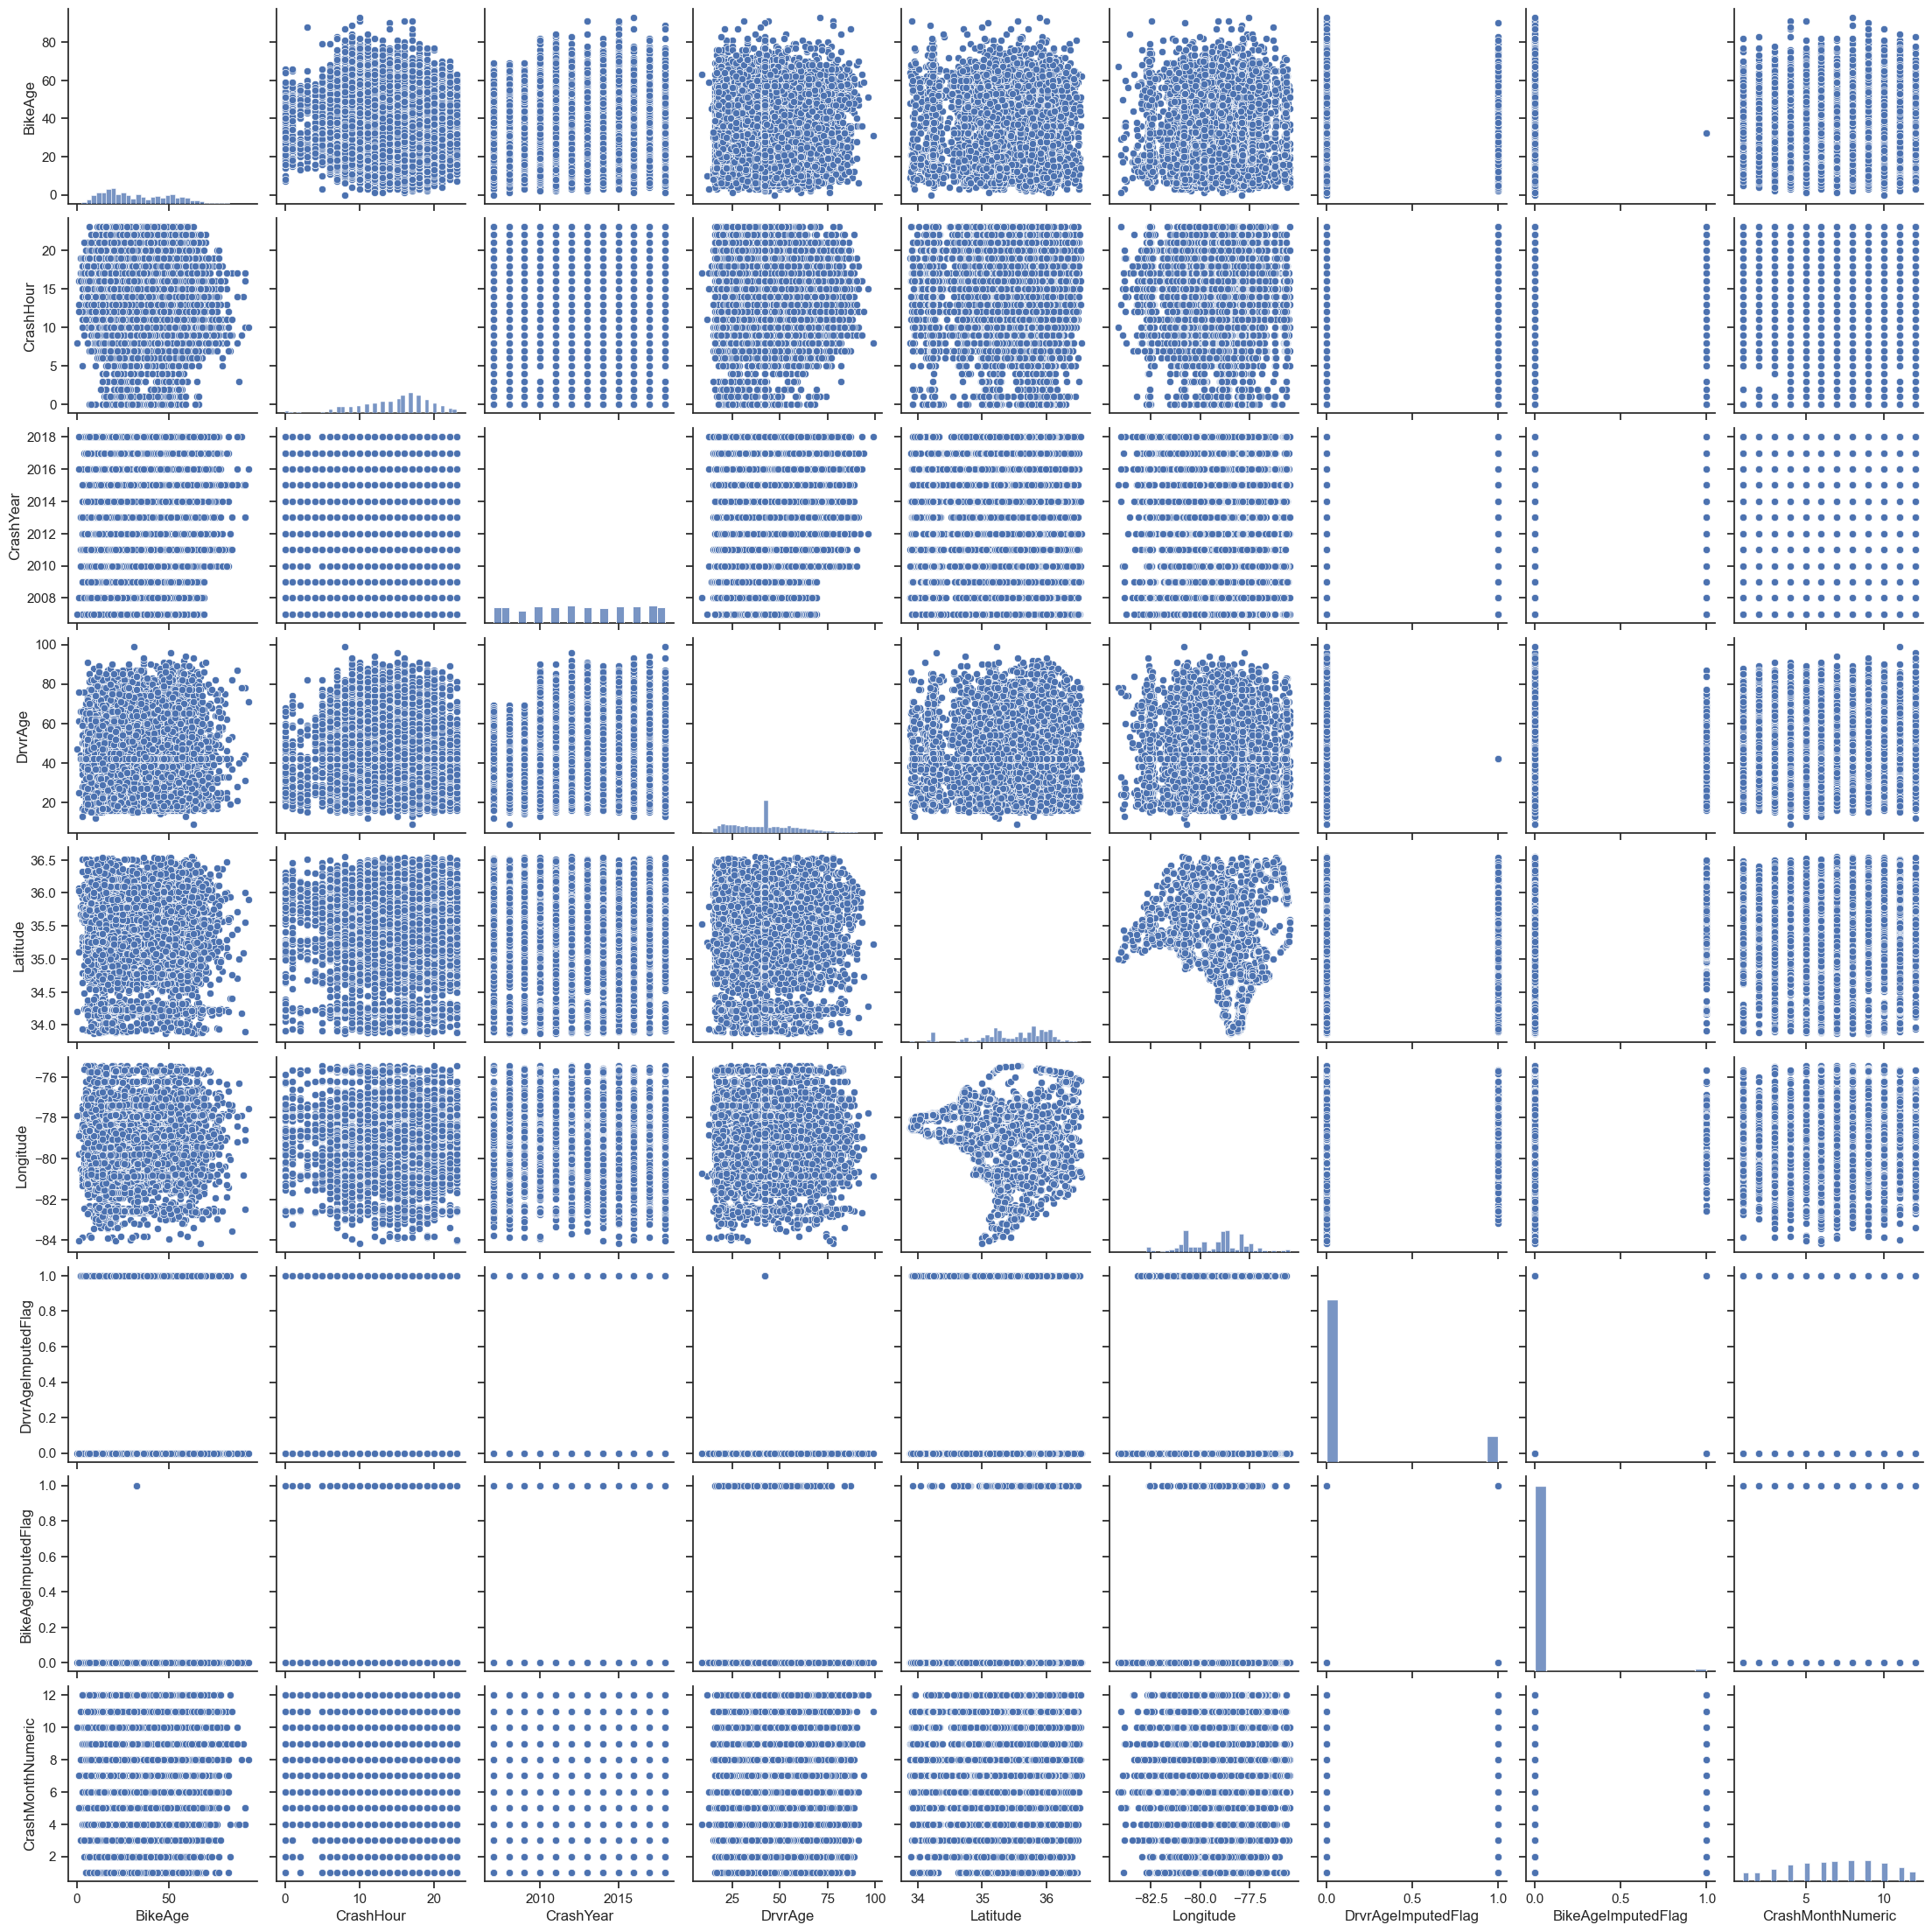

In [41]:
# Create a pair plot of the dataset
sns.pairplot(df)
plt.show()

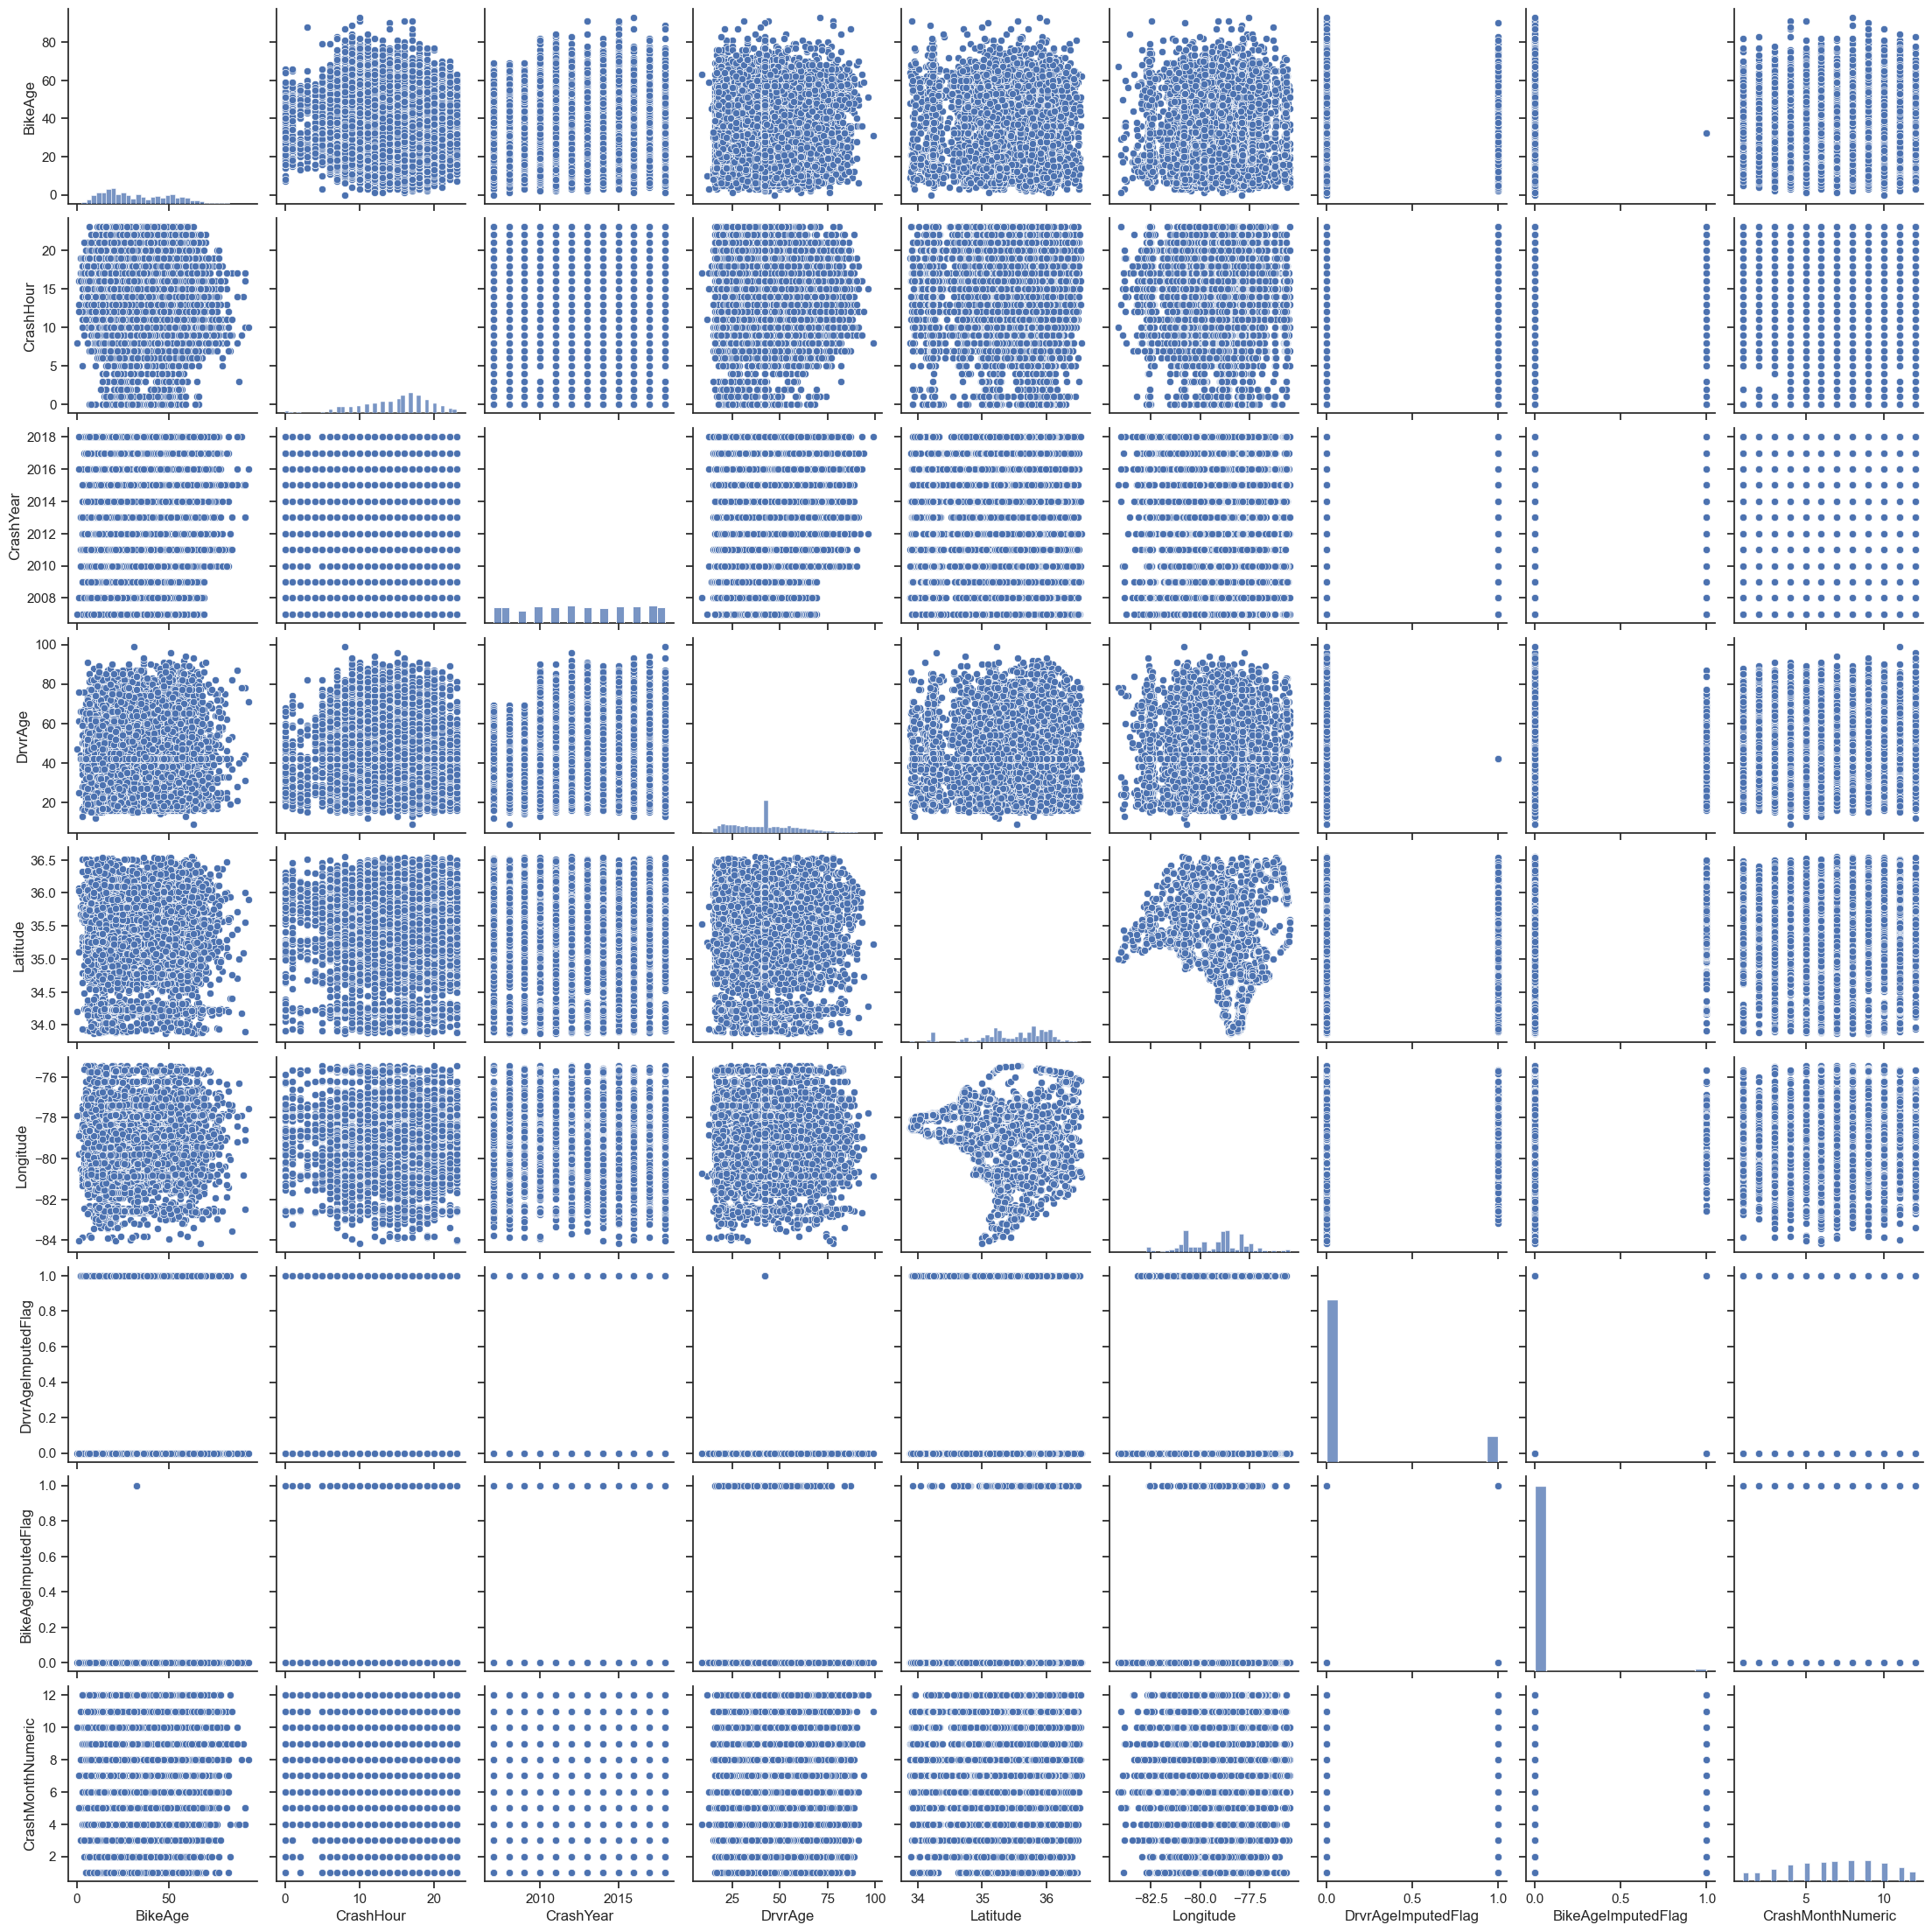

In [43]:
sns.pairplot(df)
plt.savefig(r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Achievement 6\North Carolina Bike Crash Analysis\05 Visualization\pairplot.png')

The plots to focus on most moving forward include; the histograms for driver age and crash hour since they show a normal/skewed distribution for seeing if maybe a certain popularly occuring value might be the cause of accidents; the longitude and lattidude plots with crash hour and finally, the longitude and lattitude plots with eachother to identify risky locations. 

<Axes: xlabel='CrashHour', ylabel='Count'>

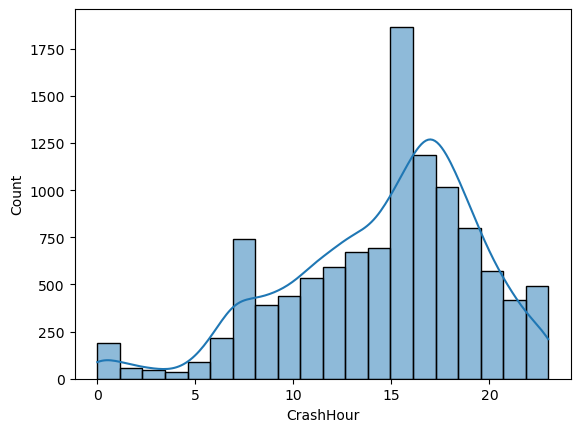

In [20]:
# Use a histogram to visualize the distribution of the 'CrashHour' variable
sns.histplot(df['CrashHour'], bins = 20, kde = True)

In [21]:
df.loc[df['CrashHour'] < 7, 'Time Risk'] = 'Safest Time'

In [27]:
df.loc[(df['CrashHour'] >= 7) & (df['CrashHour'] < 21), 'Time Risk'] = 'Dangerous Time'

In [28]:
df.loc[df['CrashHour'] >= 21, 'Time Risk'] = 'Fairly Safe Time'

In [29]:
df['Time Risk'].value_counts(dropna = False)

Dangerous Time      9503
Fairly Safe Time     910
Safest Time          631
Name: Time Risk, dtype: int64

<Figure size 1000x600 with 0 Axes>

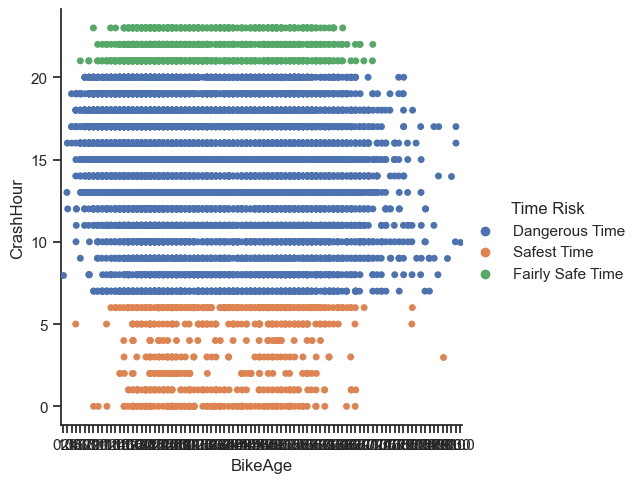

In [34]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="BikeAge", y="CrashHour", hue="Time Risk", data=df)

In [33]:
# fig = g.get_figure()
g.savefig("out.png") 


## 7. Answering questions and hypothesis:

Questions Answered: Leading Causes of Bike accidents? It seems based on these quanitative variable the hour of the day might have something to do with it and the age of the drivers seem to be normally distributed around a value. As for possible new questions; What else might be going on in the peaks seen in the lattitude and longitude histograms regarding other categorical variables?

Hypothesis: most crashes will be from younger drivers and bicyclists. 